In [34]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read and Visualize Data:

In [2]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Print dataset info
def print_dataset_info(df):
    num_rows, num_columns = df.shape

    print("========== DATASET INFO ==========")
    print(f"Number of entries: {num_rows}")
    print(f"Number of columns: {num_columns}")
    print()
    print(df.info())
    print()
    print(df.isnull().sum())

In [7]:
print_dataset_info(df)

========== DATASET INFO ==========
Number of entries: 48895
Number of columns: 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_

Roughly 1/5 of the dataset has nulls, let's get rid of them

In [8]:
clean_df = df.copy()
clean_df.reviews_per_month = df.reviews_per_month.fillna(0)
clean_df = clean_df.dropna()
display(clean_df.head())
print_dataset_info(clean_df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


========== DATASET INFO ==========
Number of entries: 38821
Number of columns: 16

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_

In [9]:
#Set seaborn themes
#sns.set_theme(style="whitegrid")
sns.set_theme()
sns.set_color_codes("pastel")

In [11]:
def comparison_count(df1, df2, column, figsize=None, same_ordering=True):
    df1 = df1.groupby([column])[column].count().sort_values(ascending=False).head(50)
    df2 = df2.groupby([column])[column].count().sort_values(ascending=False).head(50)

    if figsize:
        f, ax = plt.subplots(1, 2, figsize=figsize, sharex=True)
    else:
        f, ax = plt.subplots(1, 2,sharex=True)
    
    order_plot_2 = df1.keys() if same_ordering else df2.keys()
    
    #Plot df1 dataset info
    ax[0].set_title("Raw dataset")
    ax[0].set_xlabel("Number of listigns")
    sns.barplot(x=df1.values, y=df1.keys(),
                label=column + " count", color="b", ax=ax[0], orient='h', order=df1.keys())
    ax[0].set_ylabel(column.capitalize())

    #Plot df2 dataset info
    ax[1].set_title("Clean dataset")
    ax[1].set_xlabel("Number of listigns")
    sns.barplot(x=df2.values, y=df2.keys(),
                label=column + "count", color="b", ax=ax[1], orient='h', order=order_plot_2)
    ax[1].set_ylabel(column.capitalize())

    
    plt.show()

### `Neighbourhood` column exploration

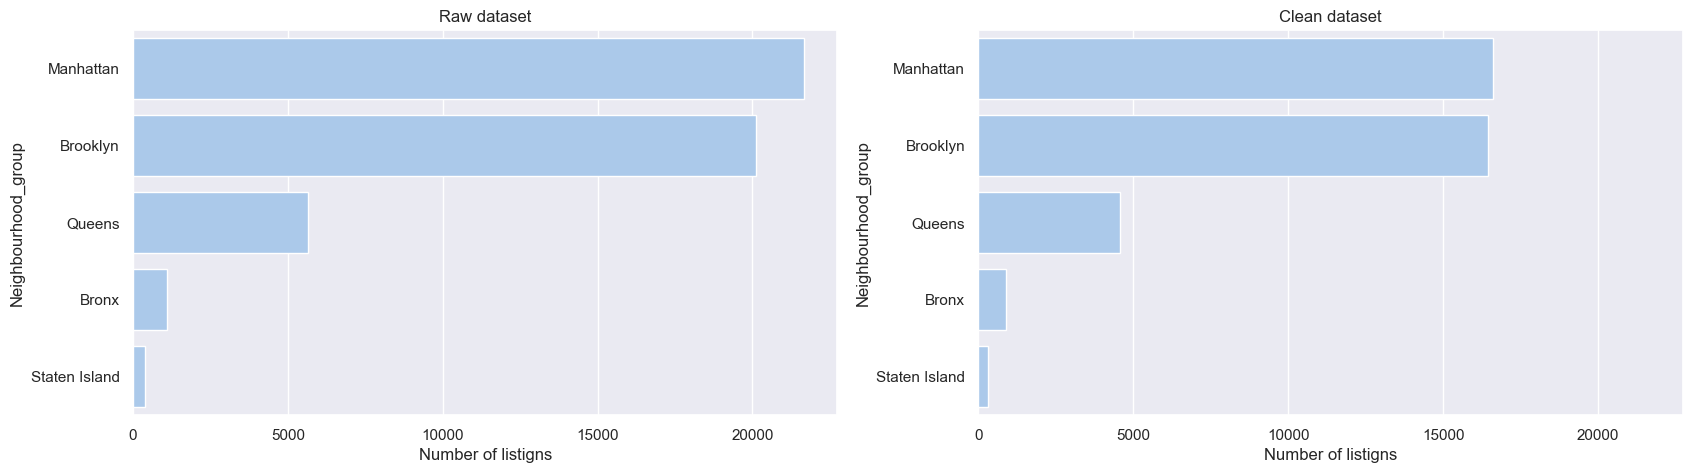

In [12]:
#Neighbourhood column exploration
comparison_count(df, clean_df, "neighbourhood_group", figsize=(20,5))

### `Host` column exploration

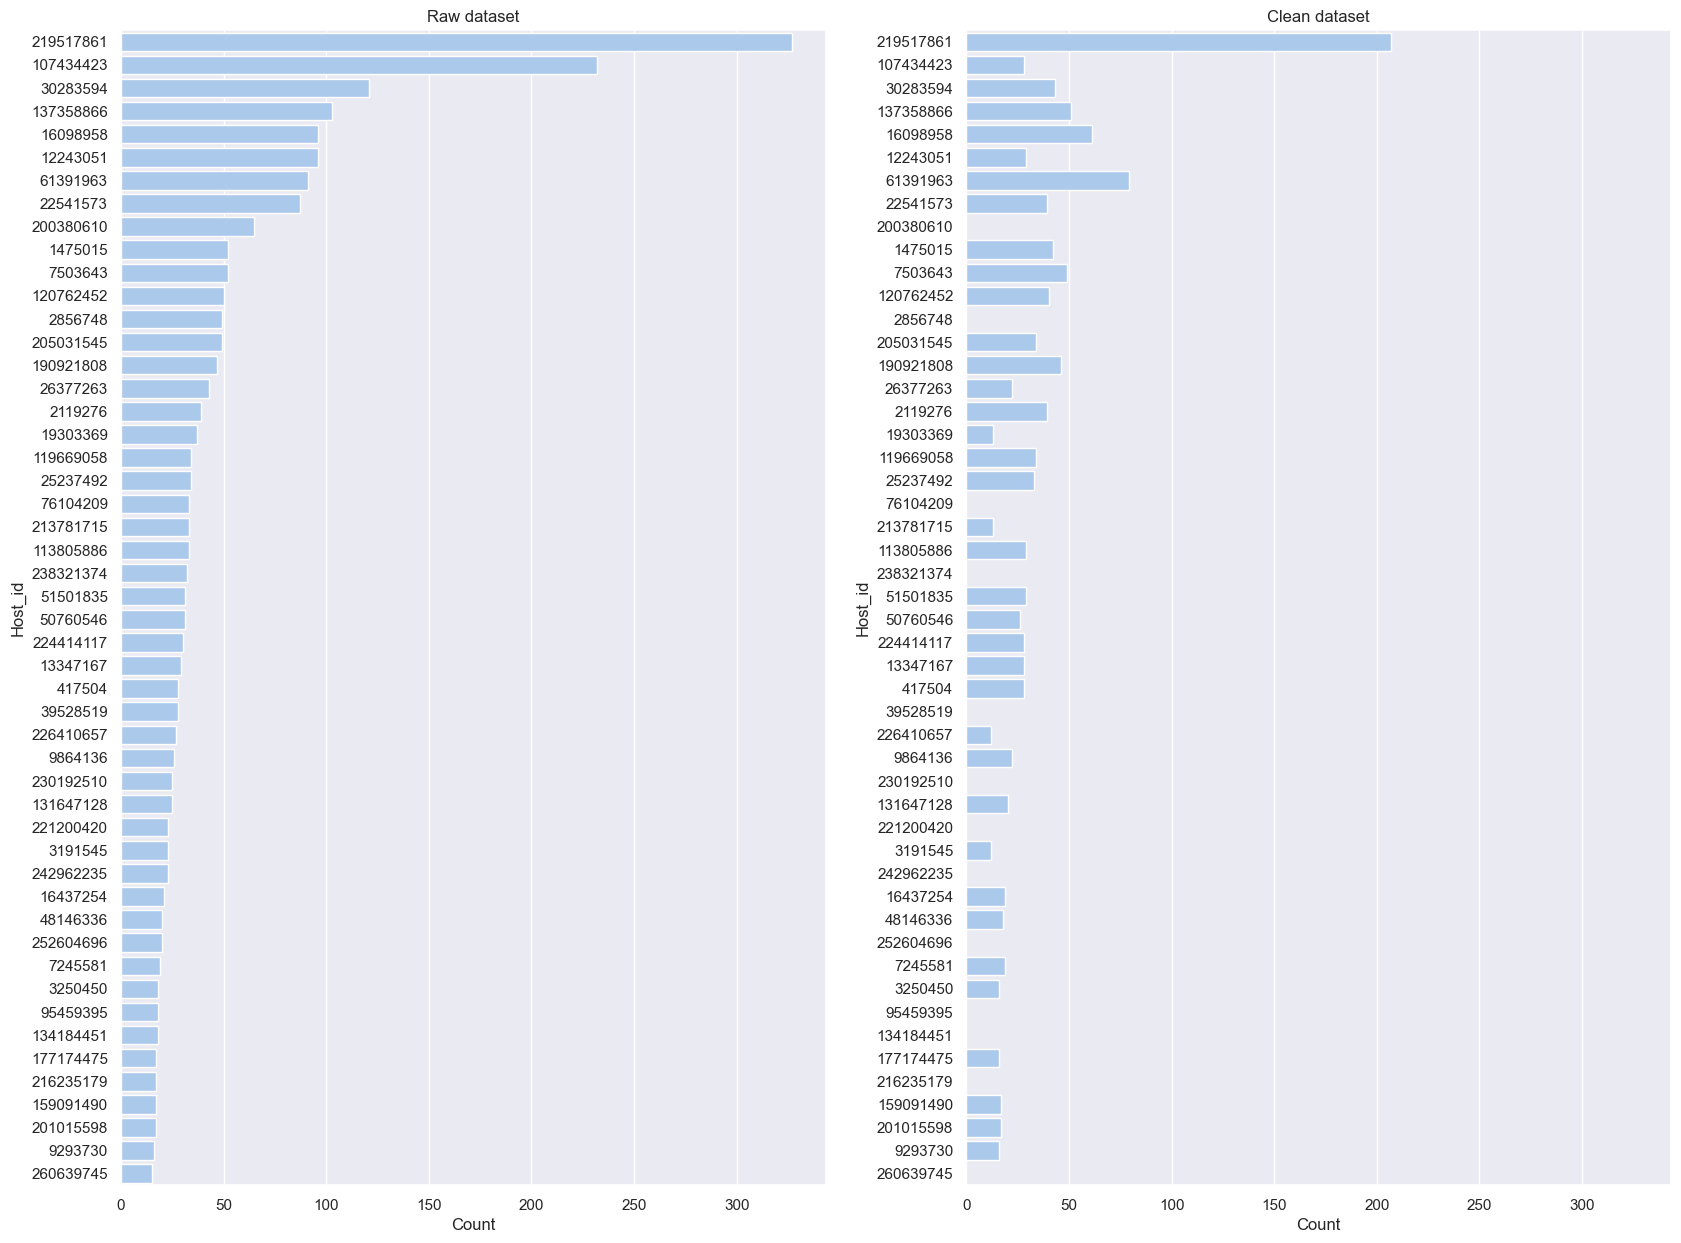

In [36]:
#Host column exploration
comparison_count(df, clean_df, "host_id", figsize=(20,15))

### `Room Type` column exploration

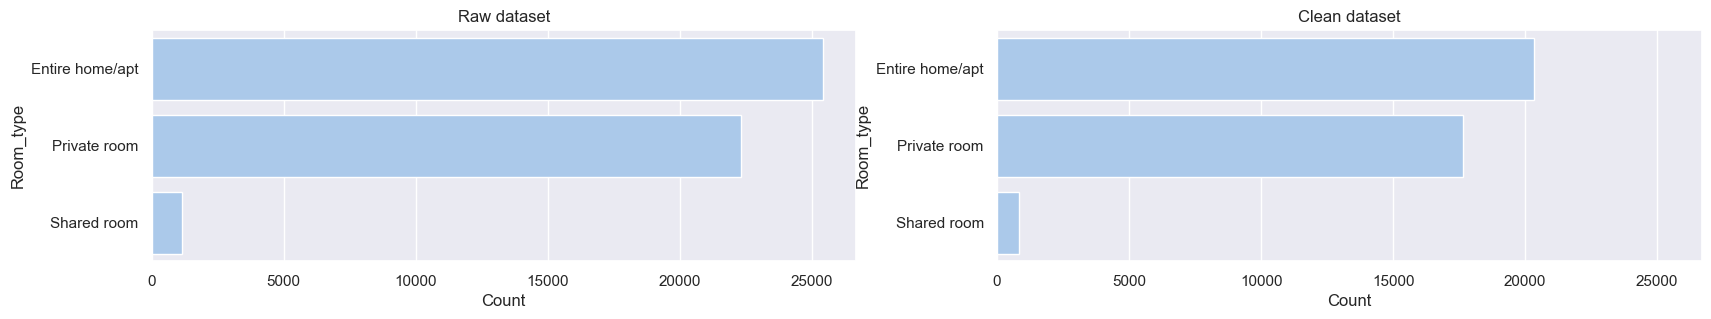

In [37]:
# Room Type column exploration
comparison_count(df, clean_df, "room_type", figsize=(20,3))

### `Price`, `Number of reviews`, `Reviews per month`, `Calculated host listings count` and `Availability` column exploration

In [38]:
def plot_hist_box(df, column ,ax_line, top_q=None, bot_q=None):

    if top_q:
        df = df[df[column] < df[column].quantile(top_q)]
    if bot_q:
        df = df[df[column] > df[column].quantile(bot_q)]

    sns.histplot(df[column], bins=45, kde=True, ax=ax_line[0])
    ax_line[0].set_title("Histogram")
    sns.boxplot(x=df[column], ax=ax_line[1], orient='h')
    ax_line[1].set_title("Boxplot")

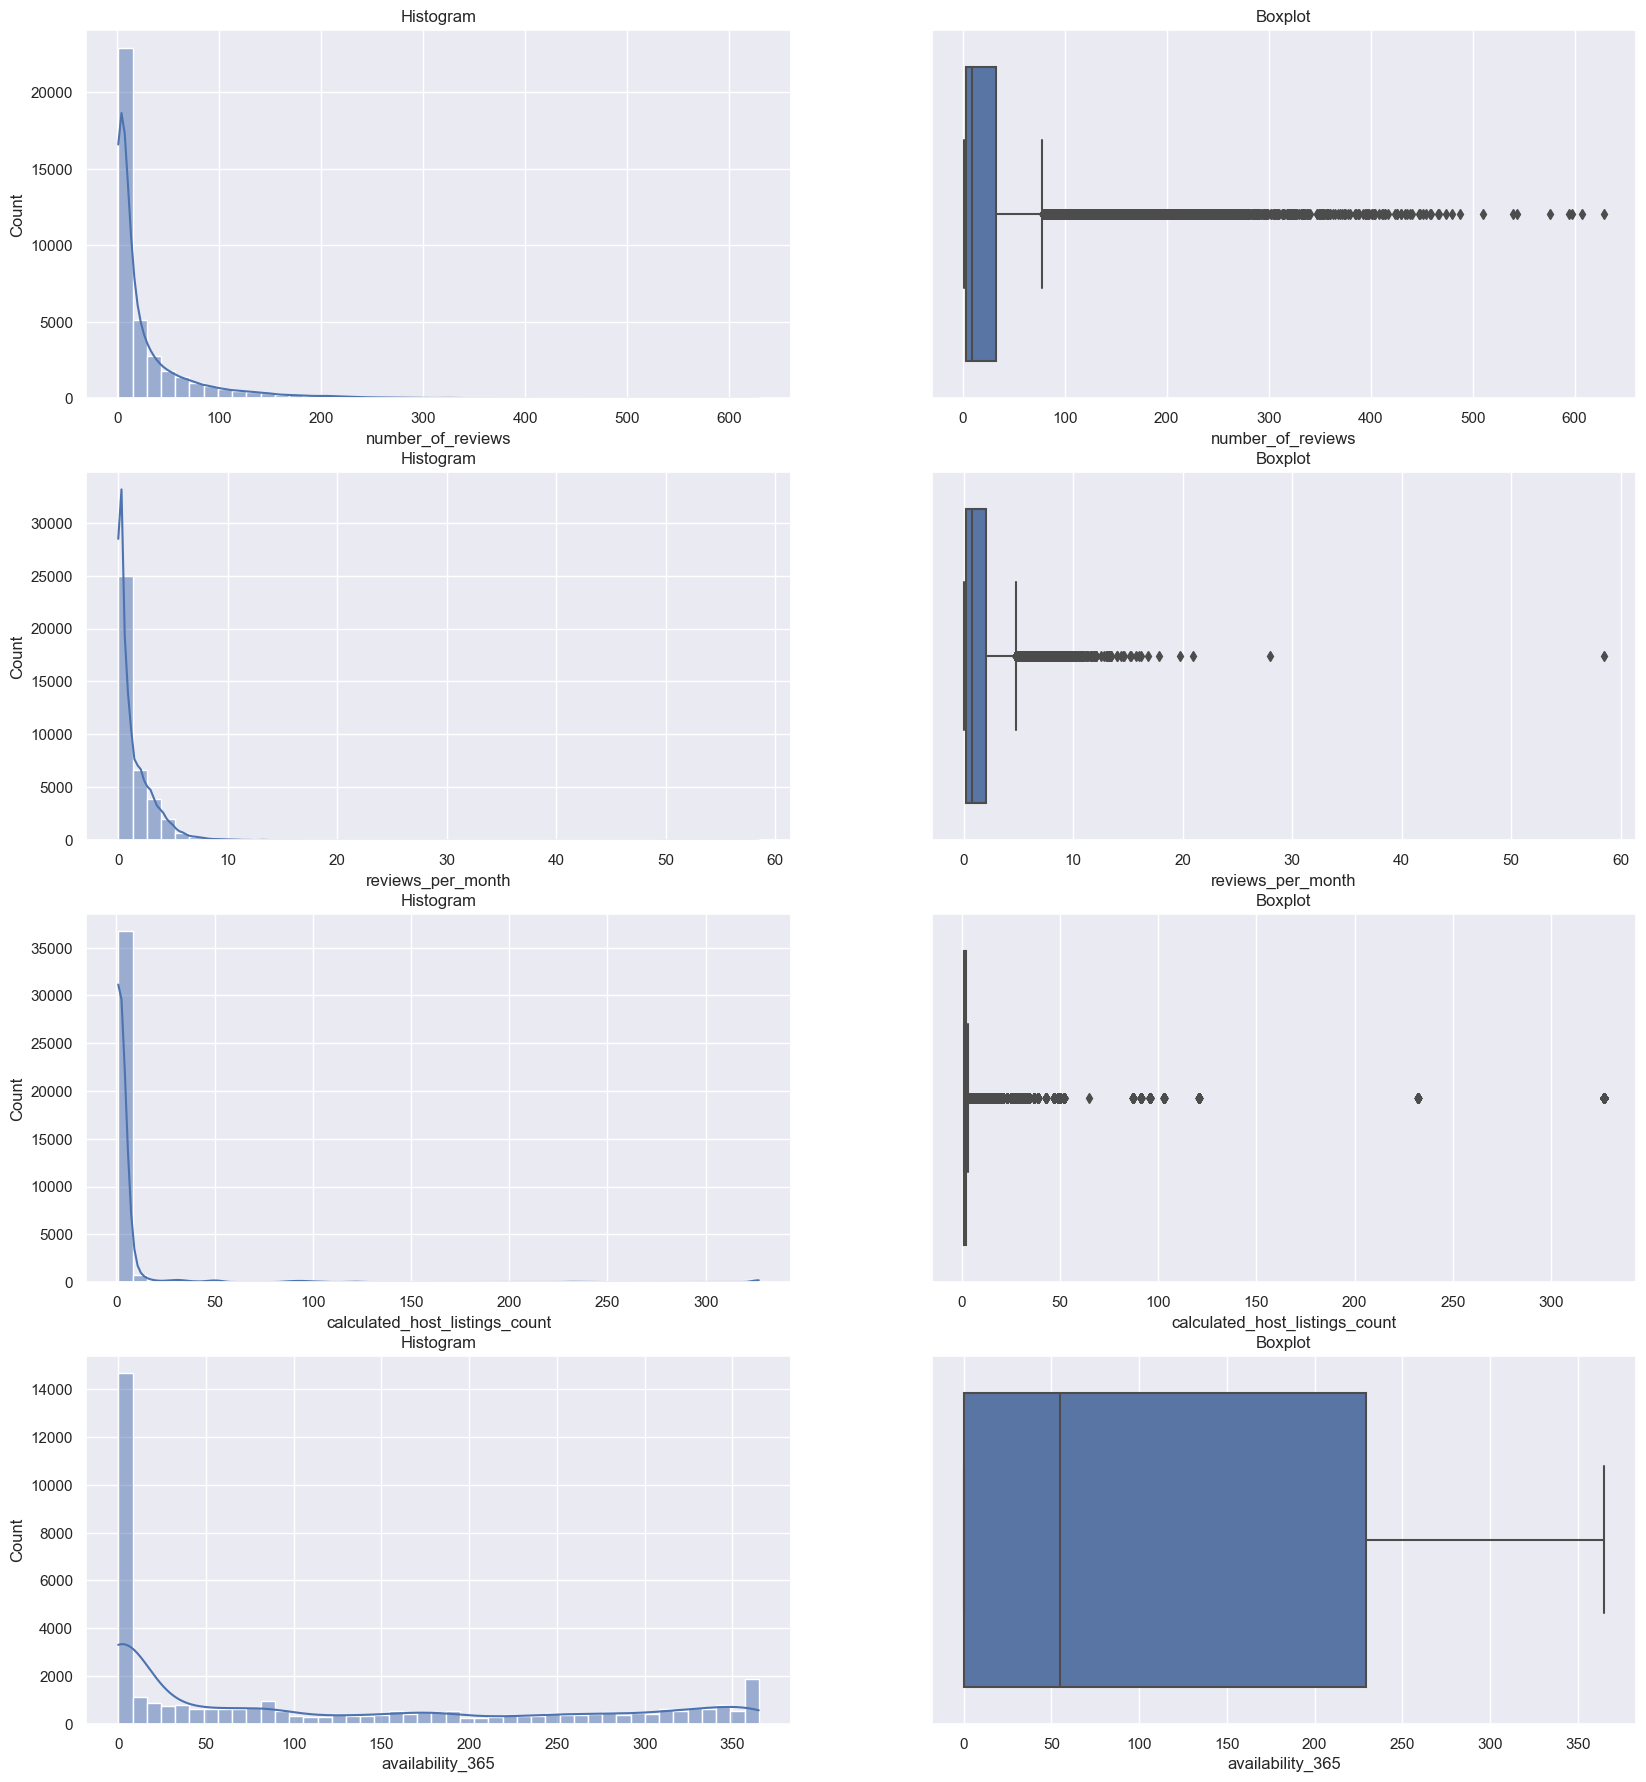

In [20]:
fig, ax = plt.subplots(4, 2, figsize=(20,22))
plot_hist_box(clean_df, 'number_of_reviews', ax_line=ax[0])
plot_hist_box(clean_df, 'reviews_per_month', ax_line=ax[1])
plot_hist_box(clean_df, 'calculated_host_listings_count', ax_line=ax[2])
plot_hist_box(clean_df, 'availability_365', ax_line=ax[3])
plt.show()

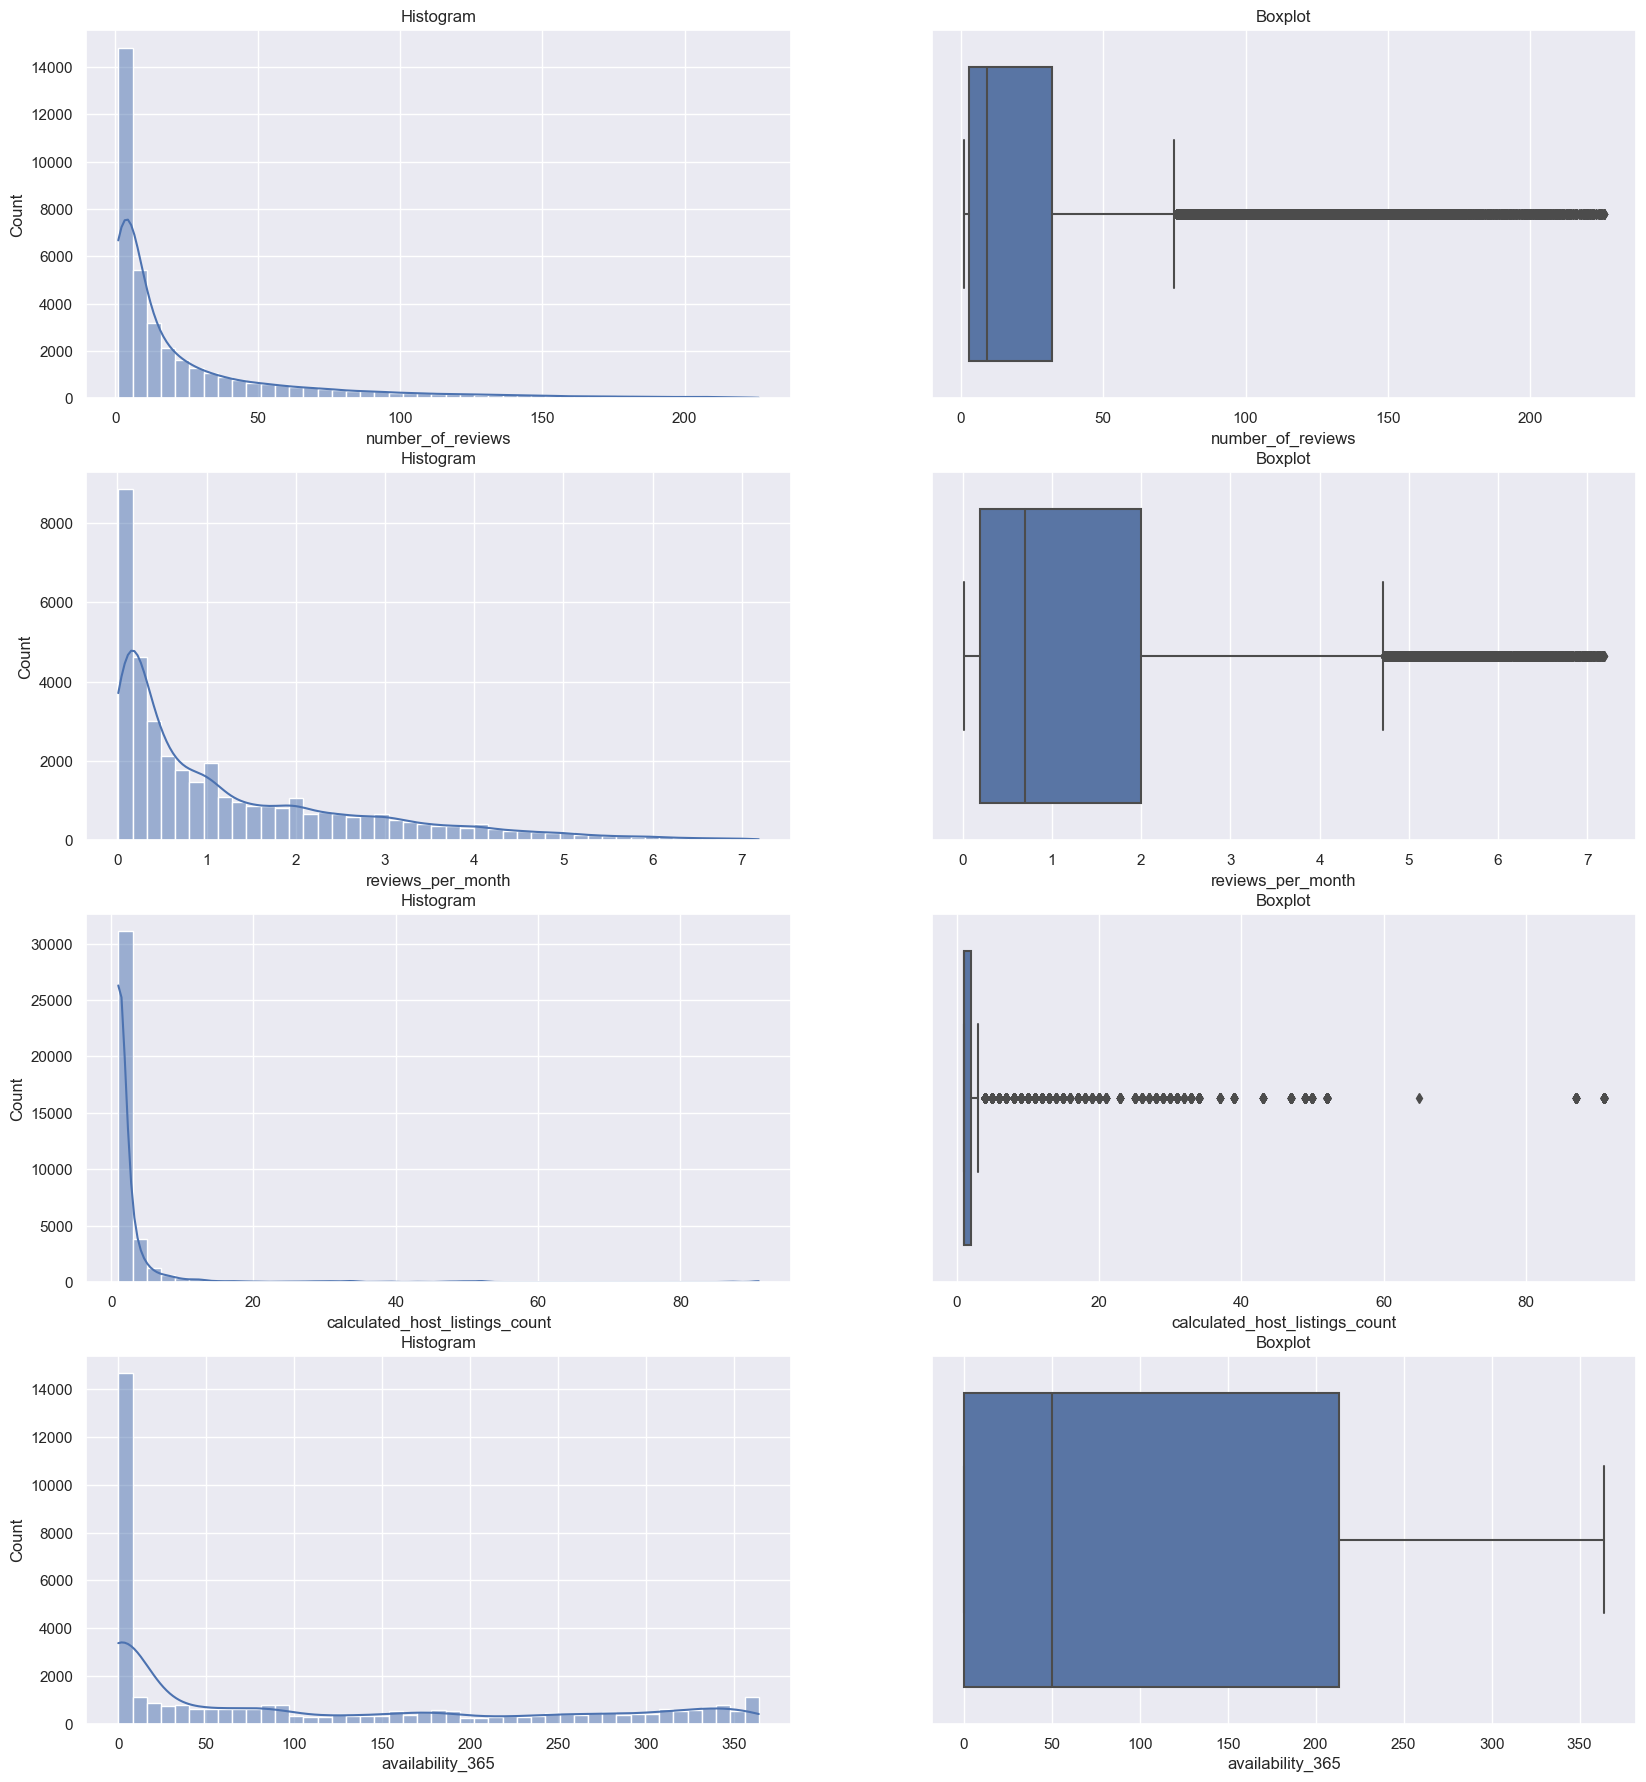

In [21]:
# Removing some outliers
fig, ax = plt.subplots(4, 2, figsize=(20,22))
plot_hist_box(clean_df, 'number_of_reviews', ax_line=ax[0], top_q=0.99)
plot_hist_box(clean_df, 'reviews_per_month', ax_line=ax[1], top_q=0.99)
plot_hist_box(clean_df, 'calculated_host_listings_count', ax_line=ax[2], top_q=0.99)
plot_hist_box(clean_df, 'availability_365', ax_line=ax[3], top_q=0.99)
plt.show()

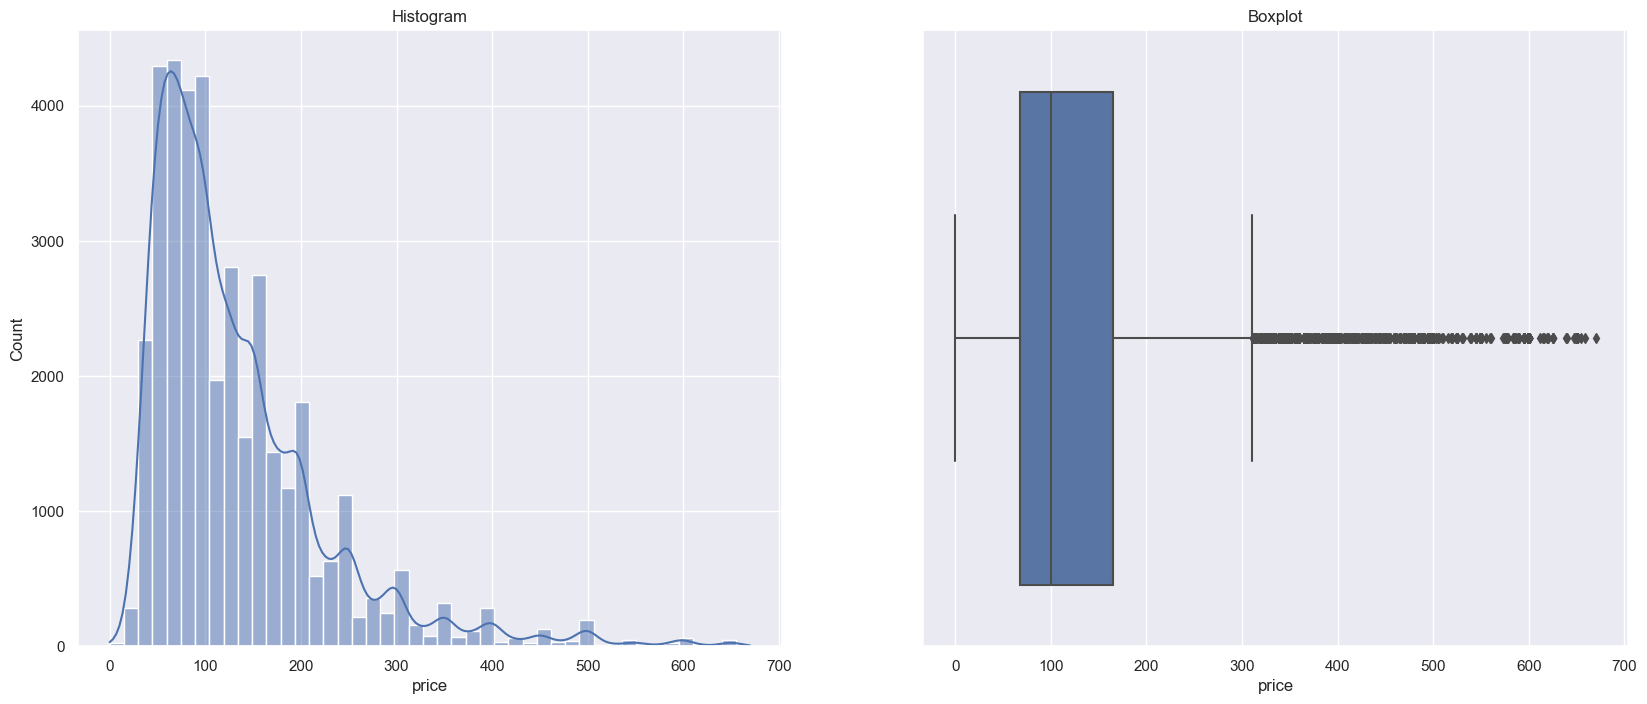

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
plot_hist_box(clean_df, 'price', ax_line=ax, top_q=0.99)
plt.show()

## Feature correlation and selection

Let's visualize the heatmap of the correlation matrix of the features in <code>clean_df</code>

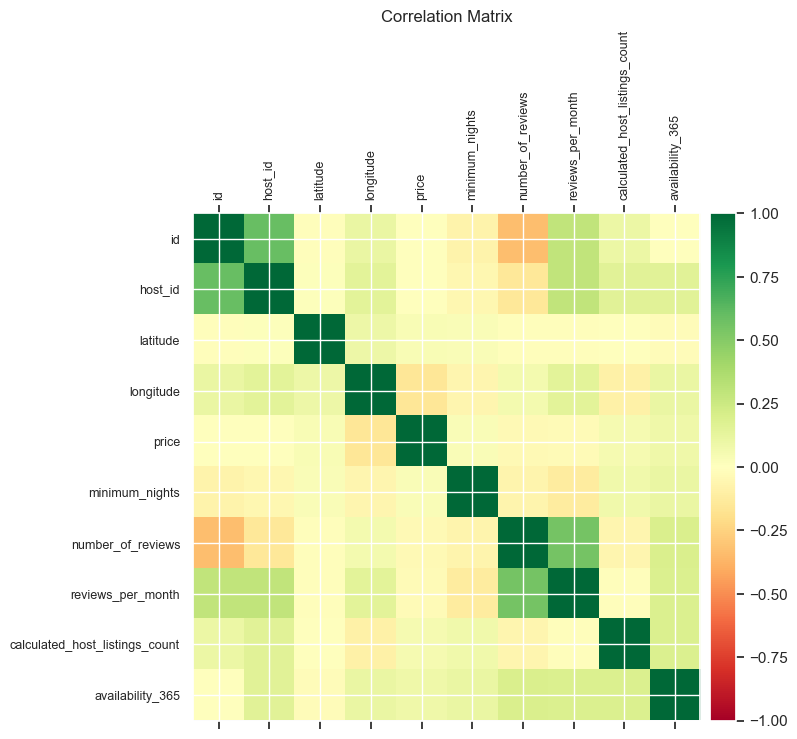

================== Correlations with our candidate target: Price ==================


,longitude,number_of_reviews,reviews_per_month,id,host_id,minimum_nights,latitude,calculated_host_listings_count,availability_365,price
price,-0.155298,-0.035924,-0.030623,-0.006696,0.006263,0.025501,0.031344,0.052895,0.078276,1.0


In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
    
plt.figure(figsize=(7,7))
plt.title("Correlation Matrix")
ax = plt.gca()
matrix = ax.matshow(clean_df.corr(), vmin=-1, vmax=1, cmap='RdYlGn')
plt.xticks(range(clean_df.select_dtypes(['number']).shape[1]), clean_df.select_dtypes(['number']).columns, fontsize=9, rotation=90)
plt.yticks(range(clean_df.select_dtypes(['number']).shape[1]), clean_df.select_dtypes(['number']).columns, fontsize=9)
    
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(matrix, cax=cax)
plt.show()


print(f"================== Correlations with our candidate target: Price ==================")
target = clean_df.corr()['price']
display(pd.DataFrame(target.sort_values()).transpose())

We will drop the following features given their correlation with <code>price</code>:

In [24]:
df2 = clean_df.drop(['longitude','id', 'host_id', 'latitude', 'name', 'last_review', 'host_name'], axis=1)
df2.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


In [32]:
df2 = pd.get_dummies(df2)
df2

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,89,1,270,4.64,1,194,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,80,10,9,0.10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,200,3,74,0.59,1,129,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,129,1,1,1.00,1,147,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
48790,45,1,1,1.00,6,339,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48799,235,1,1,1.00,1,87,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48805,100,1,2,2.00,1,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
X = df2.drop('price', axis= 1)
y = df2.price 

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 300)

Rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)
Rf_model.fit(x_train,y_train)
y_predict=Rf_model.predict(x_test)

mean_squared_error(y_test, y_predict)


19839.071184385008